## About the Problem Set: 

Dataset: nycflights13

In this problem set I will perform a basic exploratory analysis on
an example dataset, bringing to bear all of my new skills in data
manipulation and visualization. 


## Preliminaries

In [368]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s" %
       sklearn.__version__)
import os
# for certain system-related functions

IPython version:       7.8.0
Numpy version:        1.17.2
SciPy version:         1.3.1
Pandas version:       0.25.1
Mapltolib version:     3.1.1
Scikit-Learn version: 0.21.3


In [267]:
## Let's read the data and print some summary information
## adjust the path for your file system!
## you can find the path like this:
path = os.getcwd()
print(path)
os.chdir('/Users/saransharora/Desktop')
flights_df= pd.read_csv('flights.csv')

/Users/saransharora/Desktop/IMT574


In [6]:
## Extract some basic information about the data like number of rows,
## columns, column names, data types
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [7]:
## print the first and last few lines of the data
print("head\n", flights_df.head())
print("tail\n", flights_df.tail())
## Find the number of unique destinations in the data ('dest')
print("destinations:\n", flights_df.dest.unique())


head
    Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

  carrier tailnum  flight origin dest  air_time  distance  hour  minute  
0      UA  N14228    1545    EWR  IAH     227.0      1400   5.0    17.0  
1      UA  N24211    1714    LGA  IAH     227.0      1416   5.0    33.0  
2      AA  N619AA    1141    JFK  MIA     160.0      1089   5.0    42.0  
3      B6  N804JB     725    JFK  BQN     183.0      1576   5.0    44.0  
4      DL  N668DN     461    LGA  ATL     116.0       762   5.0    54.0  
tail
         Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
336771    

## Part 1

###### Let’s explore flights from NYC to LA. Use the flights dataset to answer the following questions.

###### How many flights were there from NYC airports to Los Angeles International Airport (LAX) in 2013?

In [15]:
print(len(flights_df[(flights_df.year==2013) & (flights_df.dest=='LAX')]))

16174


Which airline ('carrier') has the most flights from NYC to LAX? Which one has the least number of flights? Report the numbers respectively. 

In [268]:
# Renaming the column - Unnamed: 0 to Row
flights_df.rename(columns={'Unnamed: 0': 'Row'},inplace=True)

In [255]:
# Check number of flights for each airline
#Grouping the flight carrier and finding the most and least number of flights to LAX
carrier_group = flights_df[flights_df.dest=='LAX'].groupby(['carrier']).count()
print("Carrier with most flights from NYC to LAX: ",carrier_group.sort_values(by='Row').index[-1],carrier_group.sort_values(by='Row').iloc[-1].Row)
print("Carrier with least flights from NYC to LAX: ",carrier_group.sort_values(by='Row').index[0],carrier_group.sort_values(by='Row').iloc[0].Row)

Carrier with most flights from NYC to LAX:  UA 5823
Carrier with least flights from NYC to LAX:  B6 1688


###### How many unique air planes fly from NYC to LAX?

In [67]:
print("Unique Air planes flying from NYC to LAX:",len(flights_df[flights_df.dest=='LAX'].tailnum.unique()))

Unique Air planes flying from NYC to LAX: 992


###### What is the average arrival delay for flights from NYC to LAX?

In [82]:
print("Average arrival delay for flights from NYC to LAX:",flights_df[flights_df.dest=='LAX'].arr_delay.sum()/len(flights_df[flights_df.dest=='LAX']),"minutes")

Average arrival delay for flights from NYC to LAX: 0.5421046123407939 minutes


###### What proportion of flights to LAX come from each NYC airport?

In [103]:
print("The proportion of flights to LAX from each NYC airport is as follows: \n",flights_df[flights_df.dest=='LAX'].groupby(by=['origin']).count().Row/len(flights_df[flights_df.dest=='LAX']))

The proportion of flights to LAX from each NYC airport is as follows: 
 origin
EWR    0.303697
JFK    0.696303
Name: Row, dtype: float64


## Part 2

###### Now let's explore the entire NYC flight dataset. Flights are often delayed. 

###### Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [156]:
# Largest Average Departure Delay

date_index = flights_df.groupby(['year','month','day']).count().index.tolist()
dep_delay_list = flights_df.groupby(['year','month','day']).sum().dep_delay.tolist()
no_of_flights = flights_df.groupby(['year','month','day']).count().Row.tolist()
average_delay = pd.DataFrame(data=list(zip(date_index,dep_delay_list,no_of_flights)), columns=['Date','DepartureDelay','NoOfFlights'])
average_delay["AverageDelay(in minutes)"] = average_delay.DepartureDelay/average_delay.NoOfFlights
print("Date with Largest Average departure delay:",average_delay.sort_values(by='AverageDelay(in minutes)').reset_index(drop=True).Date.iloc[-1])

Date with Largest Average departure delay: (2013, 3, 8)


In [167]:
# Largest Average Arrival Delay

date_index = flights_df.groupby(['year','month','day']).count().index.tolist()
arr_delay_list = flights_df.groupby(['year','month','day']).sum().arr_delay.tolist()
no_of_flights = flights_df.groupby(['year','month','day']).count().Row.tolist()
average_arrival_delay = pd.DataFrame(data=list(zip(date_index,arr_delay_list,no_of_flights)), columns=['Date','ArrivalDelay','NoOfFlights'])
average_arrival_delay["AverageArrivalDelay"] = average_arrival_delay.ArrivalDelay/average_arrival_delay.NoOfFlights
print("Date with Largest Average Arrival delay:",average_arrival_delay.sort_values(by='AverageArrivalDelay').reset_index(drop=True).Date.iloc[-1])

Date with Largest Average Arrival delay: (2013, 3, 8)


###### What was the worst day and the best day to fly out of NYC in 2013 if you dislike delayed flights?

In [208]:
# The average_delay dataframe consists of average delay in flights flying from NYC per day.
# Making a deep copy for average_delay and fixing the column name AverageDelay(in minutes)
average_dep_delay = average_delay.copy(deep=True)
average_dep_delay.rename(columns={'AverageDelay(in minutes)':'AverageDepDelay'},inplace=True)
avg_pos_dep_delay = average_dep_delay[average_dep_delay.AverageDepDelay>=0].sort_values(by='AverageDepDelay')
avg_pos_dep_delay.reset_index(drop=True, inplace=True)

print("Best day to fly out of NYC in 2013, in case of a delay:",avg_pos_dep_delay.iloc[0,0],"with average delay:",avg_pos_dep_delay.iloc[0,3],"minutes")
print("Worst day to fly out of NYC in 2013, in case of a delay:",avg_pos_dep_delay.iloc[-1,0],"with average delay:",avg_pos_dep_delay.iloc[-1,3],"minutes")

Best day to fly out of NYC in 2013, in case of a delay: (2013, 1, 15) with average delay: 0.12192393736017897 minutes
Worst day to fly out of NYC in 2013, in case of a delay: (2013, 3, 8) with average delay: 68.17773237997957 minutes


###### On average which airline has the lowest departure delay for their NYC flights in 2013 in this dataset? and which one has the greatest departure delay?   

In [209]:
flights_df.head(2)

,Row,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0


In [240]:
# Using lists to store carrier, sum of departure delay per carrier and number of flights per carrier
carrier_index = flights_df.groupby(['carrier']).sum().index.tolist()
carrier_dep_delay = flights_df.groupby(['carrier']).sum().dep_delay.tolist()
carrier_flight_count = flights_df.groupby(['carrier']).count().Row.tolist()

#Divide sum of delay by the number of flights, since every carrier can have different number of flights. 

carrier_dep_info = pd.DataFrame(data = list(zip(carrier_index, carrier_dep_delay, carrier_flight_count)), columns = ['Carrier','SumOfDepDelay','NoOfFlightsPerCarrier'])
carrier_dep_info['AverageDepDelay'] = carrier_dep_info.SumOfDepDelay/carrier_dep_info.NoOfFlightsPerCarrier
carrier_dep_info = carrier_dep_info.sort_values(by='AverageDepDelay')
carrier_dep_info.reset_index(drop=True, inplace=True)
print("On average,",carrier_dep_info.iloc[0,0],"has the least delay of",carrier_dep_info.iloc[0,3],"minutes")
print("On average,",carrier_dep_info.iloc[-1,0],"has the most delay of",carrier_dep_info.iloc[-1,3],"minutes")

On average, US has the least delay of 3.6603038566419945 minutes
On average, F9 has the most delay of 20.127007299270073 minutes


###### Are there any seasonal patterns in departure delays for flights from NYC?

In [260]:
group_date = flights_df.groupby(by=['month']).sum()
months = group_date.index.tolist()
monthly_dep_delay = group_date.dep_delay.tolist()
monthly_delay_df = pd.DataFrame(data=list(zip(months,monthly_dep_delay)), columns = ['Months','MonthlyDelay'])

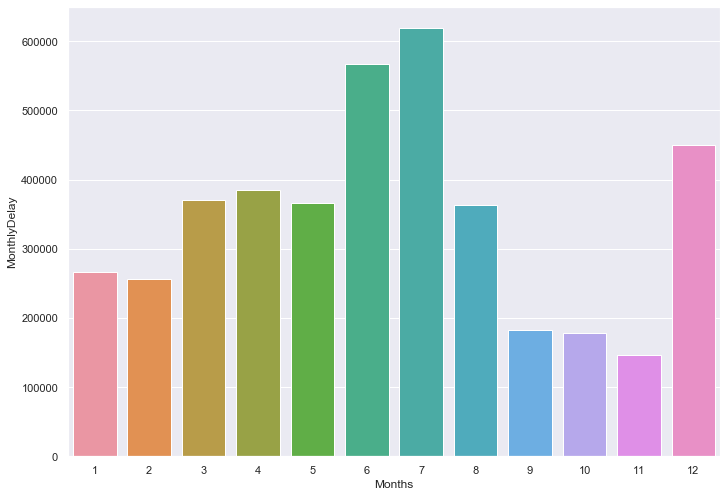

In [327]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
pl = sns.barplot(x="Months", y="MonthlyDelay", data=monthly_delay_df)

###### The months June and July see a high departure delay. It must be due to the weather or because of high travel rate of passengers. 

###### On average, how do departure delays vary over the course of a day?

/Users/saransharora/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


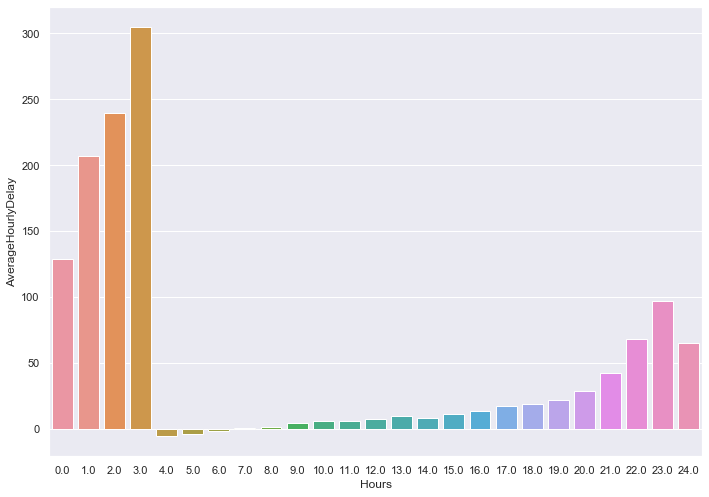

In [336]:
#Plotting the graph of variable - hour and sum of departure delay
#Dividing the sum of departure delay with the number of flights in that hour.
time_and_delay = flights_df[['hour','dep_delay']]
time_and_delay.dropna(inplace=True)
by_hour_delay = time_and_delay.groupby(by='hour').sum()
flights_hour = time_and_delay.groupby(by='hour').count()
by_hour_delay['Hours'] = by_hour_delay.index.tolist()
by_hour_delay.reset_index(drop=True, inplace=True)
by_hour_delay['NoOfFlights'] = flights_hour
by_hour_delay['AverageHourlyDelay'] = by_hour_delay.dep_delay/by_hour_delay.NoOfFlights
pl2 = sns.barplot(x="Hours", y="AverageHourlyDelay", data=by_hour_delay)

###### The hourly average delay is at its peak at 3 Am, and significantly drops at 4 am. 4 am onwards, it starts to rise till 12 am and then again rise quickly. Therefore the worst time to take a flight would be around 2-3 am. The best time would be around 4 am. 

## Part 3

###### Which flight departing NYC in 2013 flew the slowest?

In [370]:
# air_time --> minutes
# distance --> miles
flight_speed = flights_df.copy(deep=True)
flight_speed['Speed'] = flight_speed.distance/(flight_speed.air_time/60)
flight_speed = flight_speed[pd.notnull(flight_speed.Speed)]
flight_speed.sort_values(by='Speed', ascending=False, inplace=True)
flight_speed.reset_index(drop=True, inplace=True)
print("Flight",flight_speed.flight.iloc[-1],"flew the slowest speed with",flight_speed.Speed.iloc[-1],"miles/hour")

Flight 1860 flew the slowest speed with 76.8 miles/hour


## Part 4

###### Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [475]:
cfd_df = flights_df[['Date','carrier','flight','dest']]
# Checking if any duplicate rows - to check if more than one flight in one day. 
cfd_df.drop_duplicates(inplace=True)
# No duplicates
cfd_df_new = cfd_df.groupby(by=['carrier','flight','dest']).count().sort_values(by='Date',ascending=False)
everyday_flights = cfd_df_new[cfd_df_new.Date==365]
li = []
li2=[]
for i in range(len(everyday_flights.index)):
    li.append(everyday_flights.index[i][1])
    li2.append(everyday_flights.index[i][2])
flight_everyday = pd.DataFrame(data=list(zip(li,li2)), columns = ['Flight','Destination'])
print("Following are the flights that happen every day:\n\n",flight_everyday)

Following are the flights that happen every day:

     Flight Destination
0     1611         MIA
1      703         SJU
2     1357         SJU
3      413         LAX
4      219         CLT
5       15         HNL
6      359         BUR
7      371         FLL
8      431         SRQ
9      181         LAX
10    2159         MCO
11     119         LAX
12     407         LAX
13    5712         IAD
14     251         LAS
15      59         SFO
16    1783         MCO
17    2391         TPA


## Part 5

###### Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question.

In [2]:
# Research Question: Is there a relation between departure delay and arrival delay and flight in-air travel time?

In [510]:
res_df = flights_df[['air_time','dep_delay','arr_delay']]
res_df.dropna(inplace=True)

In [549]:
# Making slots of 40 and then dividing the arr_time as per slot
li = []
min_time = int(min(res_df.air_time))
max_time = int(max(res_df.air_time))
for i in range(min_time, max_time, 40):
    li.append(i)
cut = pd.cut(flights_df.air_time, bins=li, include_lowest=True)
flights_df["Air_time_binned"] = cut
flights_df.dropna(subset=['Air_time_binned'],inplace=True)
df_binned = flights_df.groupby(by='Air_time_binned').sum()
df_binned = df_binned[['dep_delay','arr_delay']]

In [592]:
flights_df.head(3)

,Row,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,Date,Air_time_binned
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0,2013-01-01,"(220.0, 260.0]"
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0,2013-01-01,"(220.0, 260.0]"
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0,2013-01-01,"(140.0, 180.0]"


In [590]:
df_binned.head(3)

,dep_delay,arr_delay
Air_time_binned,,
"(19.999, 60.0]",682705.0,415946.0
"(60.0, 100.0]",719182.0,470785.0
"(100.0, 140.0]",1082021.0,604410.0


AxesSubplot(0.125,0.125;0.775x0.755)


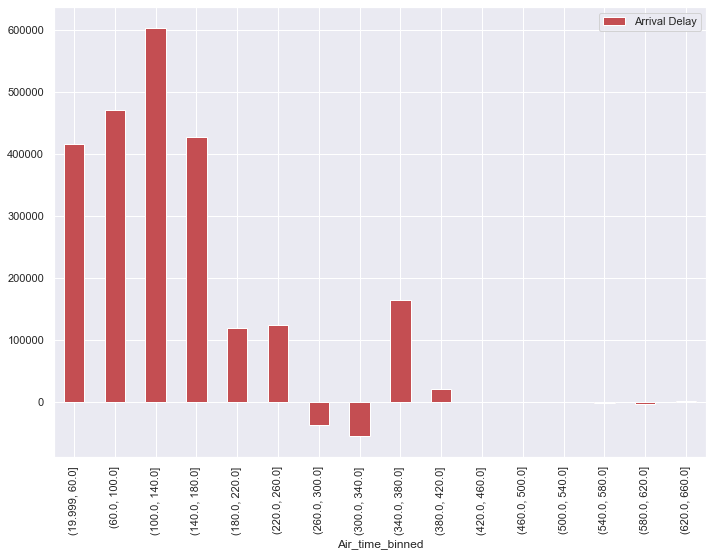

In [585]:
print(df_binned.plot.bar(y='arr_delay', color='r', label="Arrival Delay"))

AxesSubplot(0.125,0.125;0.775x0.755)


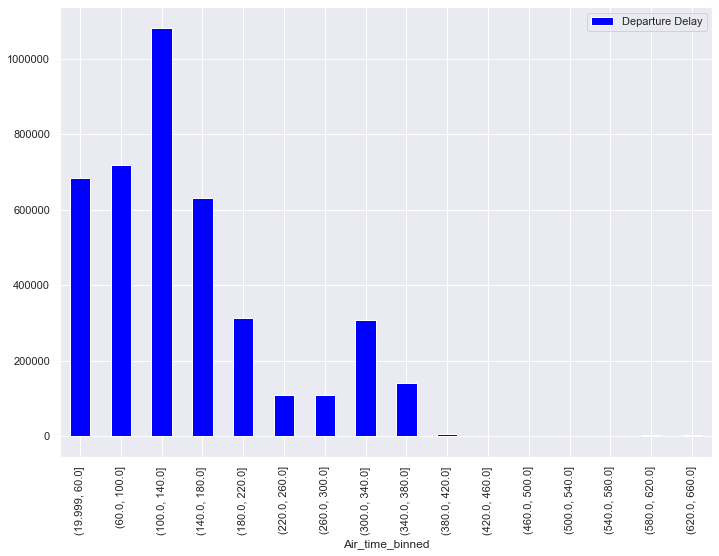

In [587]:
print(df_binned.plot.bar(y='dep_delay', color='blue', label="Departure Delay"))

#### It is visible that the longest arrival and departure delay is in the cases when the travel time is from 110-140 minutes. As the travel time increases, the departure and arrival delay is reduced. So we can say that longer duration flights are delayed less. 

## Part 6

###### What weather conditions are associated with flight delays leaving NYC? 

In [614]:
# Your code here

weather_df = pd.read_csv('weather.csv')
weather_df.rename(columns={'Unnamed: 0':'Row'},inplace=True)
weather_df.dropna(inplace=True)
weather_df.month = weather_df.month.astype(int)
weather_df.day = weather_df.day.astype(int)
weather_join_index = ['origin','year','month','day','hour']
flights_join_index = ['origin','year','month','day','hour']
flights_weather = pd.merge(flights_df, weather_df, on=['year','month','day','hour'])
flights_weather = flights_weather.groupby(by=['year','month','day']).mean()
flights_weather_day = flights_weather[['dep_delay','arr_delay', 'hour', 'minute','temp', 'dewp','humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure',
       'visib']]


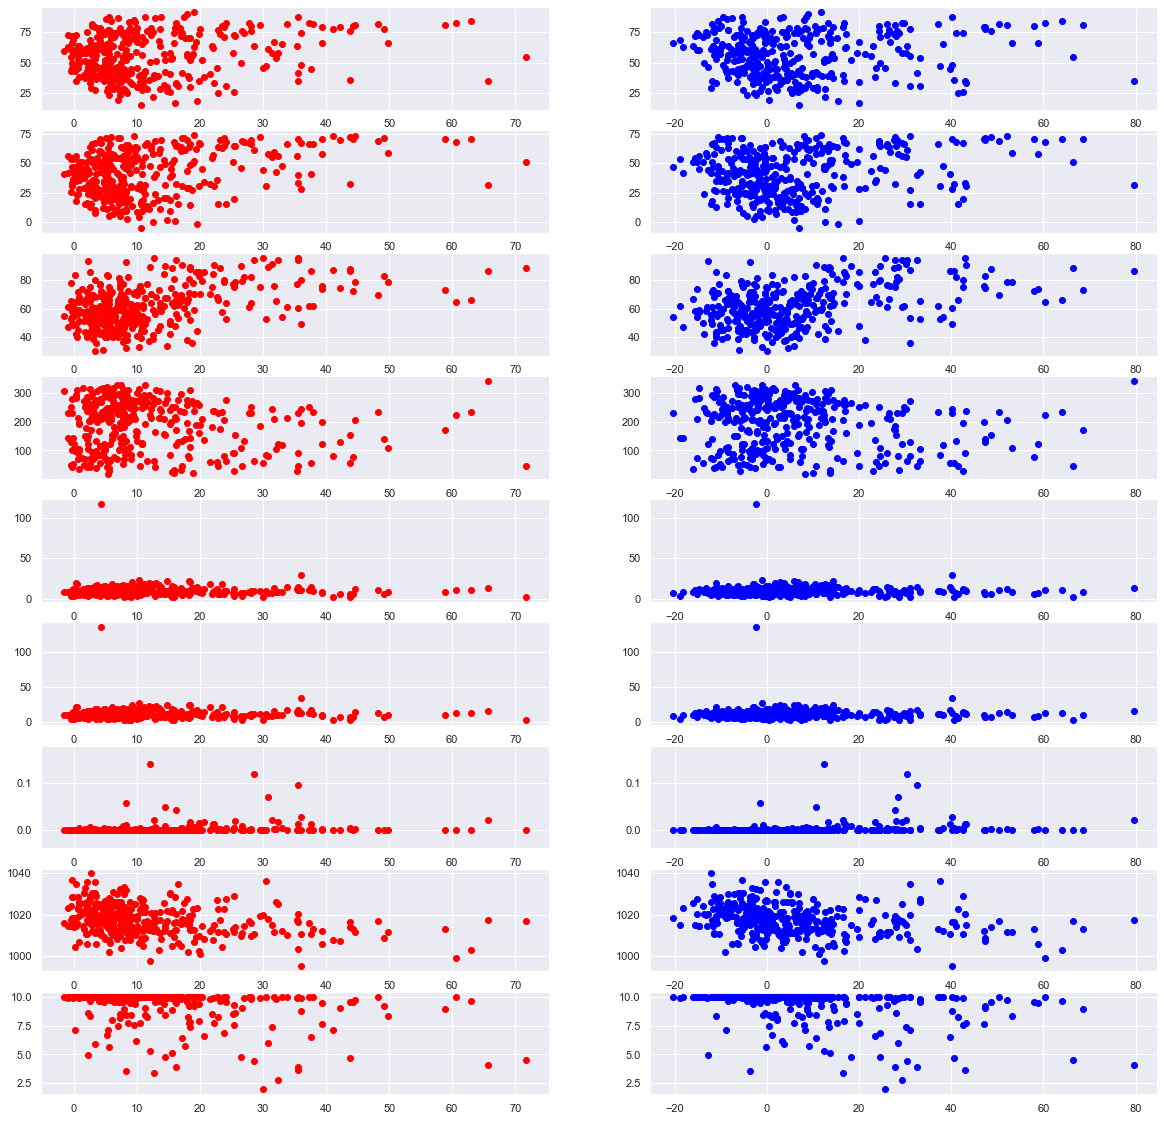

In [677]:
fig, ((ax1, ax2), (ax3, ax4),(ax5, ax6),(ax7, ax8),(ax9, ax10),(ax11, ax12),(ax13, ax14),(ax15, ax16),(ax17, ax18))\
= plt.subplots(9, 2, sharex=False, sharey=False, squeeze=False,figsize=(20,20))

x1 = np.array(flights_weather_day.dep_delay)
x2 = np.array(flights_weather_day.arr_delay)

t = np.array(flights_weather_day.temp)
d = np.array(flights_weather_day.dewp)
h = np.array(flights_weather_day.humid)
wd = np.array(flights_weather_day.wind_dir)
ws = np.array(flights_weather_day.wind_speed)
wg = np.array(flights_weather_day.wind_gust)
prec = np.array(flights_weather_day.precip)
pres = np.array(flights_weather_day.pressure)
vis = np.array(flights_weather_day.visib)

ax1.scatter(x1, t, marker='o', color='red')
ax2.scatter(x2, t, marker='o', color='blue')
ax3.scatter(x1, d, marker='o', color='red')
ax4.scatter(x2, d, marker='o', color='blue')
ax5.scatter(x1, h, marker='o', color='red')
ax6.scatter(x2, h, marker='o', color='blue')
ax7.scatter(x1, wd, marker='o', color='red')
ax8.scatter(x2, wd, marker='o', color='blue')
ax9.scatter(x1, ws, marker='o', color='red')
ax10.scatter(x2, ws, marker='o', color='blue')
ax11.scatter(x1, wg, marker='o', color='red')
ax12.scatter(x2, wg, marker='o', color='blue')
ax13.scatter(x1, prec, marker='o', color='red')
ax14.scatter(x2, prec, marker='o', color='blue')
ax15.scatter(x1, pres, marker='o', color='red')
ax16.scatter(x2, pres, marker='o', color='blue')
ax17.scatter(x1, vis, marker='o', color='red')
ax18.scatter(x2, vis, marker='o', color='blue')


The subplot in red is for departure delay(x-axis), while the subplot in blue is arrival delay(x-axis). The plot are in the following order row-wise:
1. Temperature
2. Dewp
3. Humidity
4. Wind direction
5. Wind Speed
6. Wind gust
7. Precipitation
8. Pressure
9. Visibility

1. Temperature - There is no distinct pattern for both departure and arrival delay
2. Dewp - There is no distinct pattern for both departure and arrival delay
3. Humidity - There is a slight upwards trend which shows that with humidity increases with increasing departure/arrival delay.
4. Wind direction - There is no distinct pattern for both departure and arrival delay
5. Wind Speed - There is no distinct pattern for both departure and arrival delay
6. Wind gust - There is no distinct pattern for both departure and arrival delay
7. Precipitation - There are a few outliers, but there is no strong correlation
8. Pressure - Delay tends to increase with decrease in pressure, but the relation is not very strong
9. Visibility - There is an increase in both departure and arrival delay, if the visibility decreases

# References:

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

https://stackoverflow.com/questions/18944993/combine-pandas-dataframe-datetime-columns

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

https://stackoverflow.com/questions/38405568/python2-7-how-to-create-bar-graph-using-index-and-column-information

https://stackoverflow.com/questions/43005462/pandas-bar-plot-with-binned-range

https://matplotlib.org/3.1.1/gallery/subplots_axes_and_figures/subplots_demo.html